# CNN for acoustic scene classfication: my home

Date: March 23, 2019

Neural network: input MFSCs to CNN

## Preparing data set for CNN

In [39]:
DATASET_FOLDER = '../dataset/data_my_home'

%run ../oscilloscope/script/dataset.py
%matplotlib inline

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False)['mfsc']
ds.shape
ds.class_labels

['chat',
 'reading',
 'watching_tv',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes',
 'walking',
 'piano',
 'stairs',
 'snack']

((1120, 64, 40, 1), (560, 64, 40, 1))

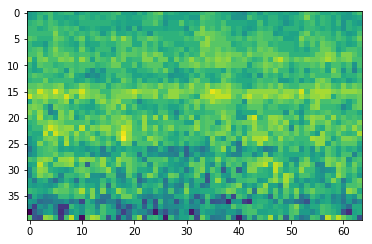

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)))
train_data.shape, test_data.shape

### CNN model

In [38]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*ds.shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(ds.class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 6, 32)         4640      
__________

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training CNN

In [18]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1120 samples, validate on 560 samples
Epoch 1/50
1120/1120 [==============================] - 37s 33ms/step - loss: 2.5190 - acc: 0.1214 - val_loss: 2.3237 - val_acc: 0.2625
Epoch 2/50
1120/1120 [==============================] - 34s 30ms/step - loss: 2.1256 - acc: 0.2339 - val_loss: 1.9443 - val_acc: 0.4000
Epoch 3/50
1120/1120 [==============================] - 34s 30ms/step - loss: 1.8905 - acc: 0.3232 - val_loss: 1.7370 - val_acc: 0.4286
Epoch 4/50
1120/1120 [==============================] - 34s 30ms/step - loss: 1.6719 - acc: 0.3973 - val_loss: 1.5683 - val_acc: 0.4607
Epoch 5/50
1120/1120 [==============================] - 34s 30ms/step - loss: 1.4947 - acc: 0.4812 - val_loss: 1.4831 - val_acc: 0.4821
Epoch 6/50
1120/1120 [==============================] - 34s 30ms/step - loss: 1.3699 - acc: 0.5295 - val_loss: 1.2661 - val_acc: 0.5821
Epoch 7/50
1120/1120 [==============================] - 36s 32ms/step - loss: 1.2972 - acc: 0.5598 - val_loss: 1.1670 - val_acc: 0.6375
E

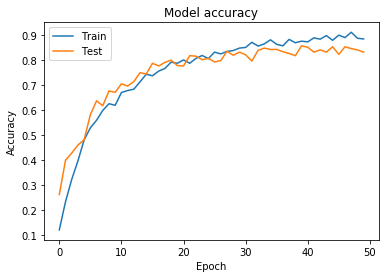

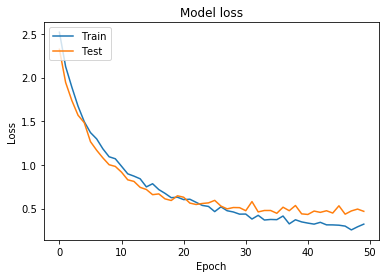

In [19]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [20]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/my_home_cnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [21]:
del model
model = models.load_model(filename)

## Confirmation

In [22]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

In [23]:
ds.class_labels

['chat',
 'reading',
 'watching_tv',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes',
 'walking',
 'piano',
 'stairs',
 'snack']

In [24]:
(activations[-1][:10]*100).astype(int)

array([[ 0,  0,  0,  0,  0,  0,  0, 98,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  3, 14,  0,  0,  7,  0,  2, 25,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 99,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 99,  0,  0],
       [55,  0, 43,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 35,  0, 28,  2,  0,  0,  0,  0,  0, 17,  0,  0, 15],
       [ 0,  5,  0,  5, 13, 67,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 99,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 99,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  2,  7,  0,  0,  0,  0, 19,  5,  0,  0,  8]])

In [25]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

'walking'

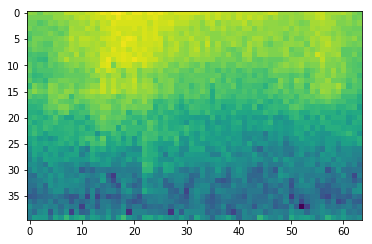

In [26]:
image_number = 5

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
ds.class_labels[np.argmax(test_labels[image_number])]

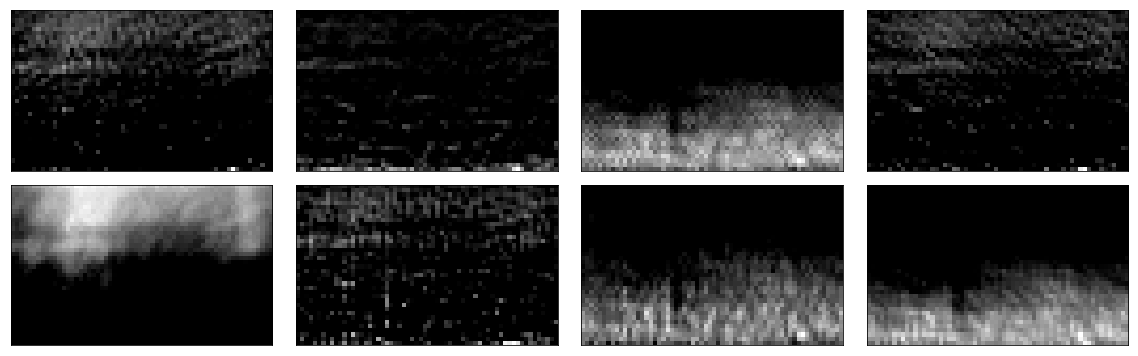

In [27]:
plot_layer(activations, image_number, 0, 4)

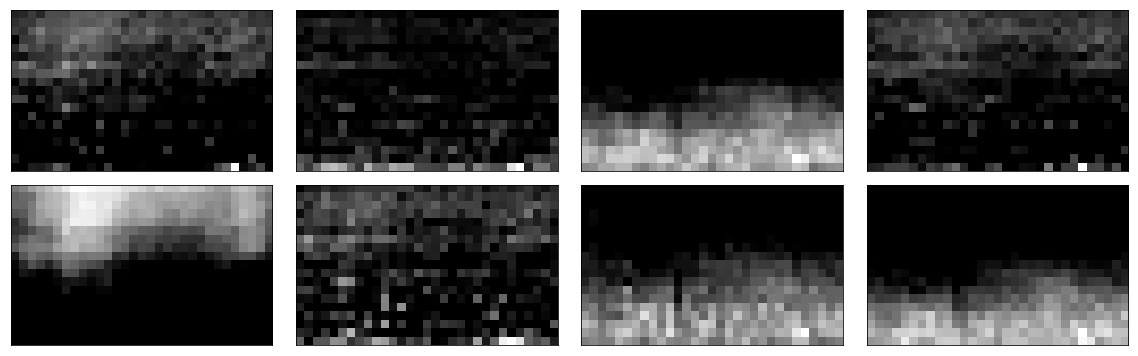

In [28]:
plot_layer(activations, image_number, 1, 4)

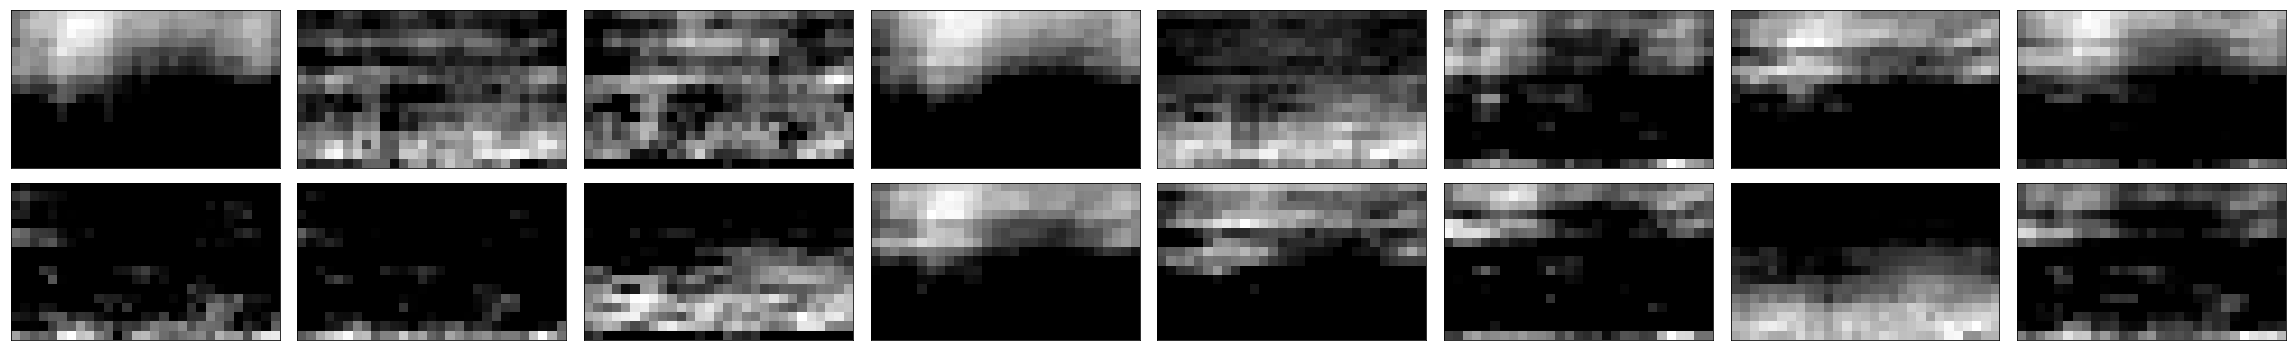

In [29]:
plot_layer(activations, image_number, 3, 8)

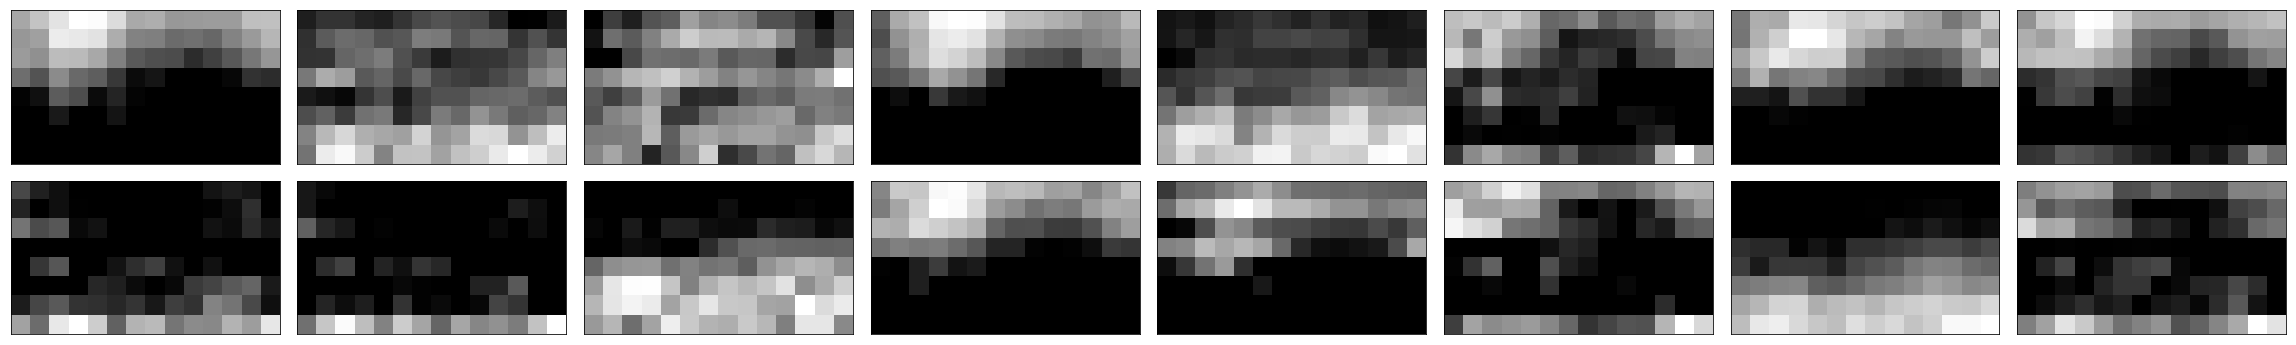

In [30]:
plot_layer(activations, image_number, 4, 8)

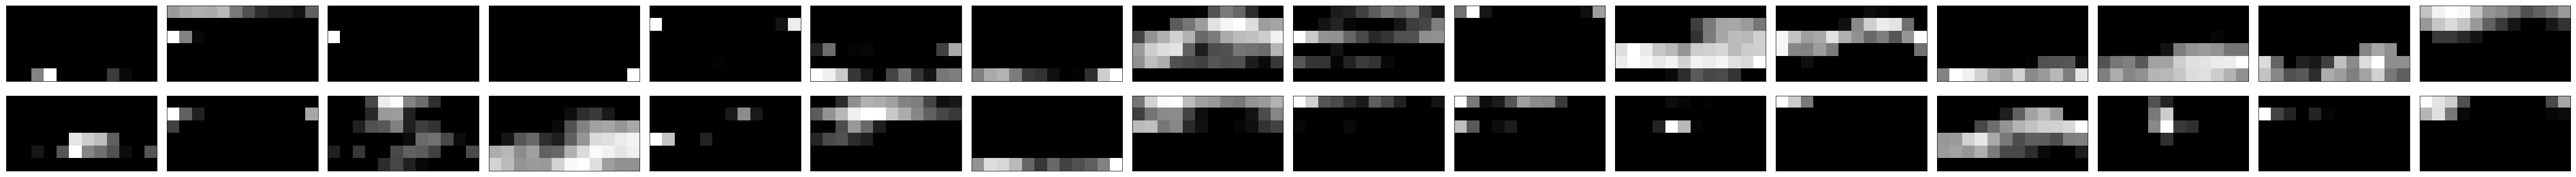

In [31]:
plot_layer(activations, image_number, 6, 16)

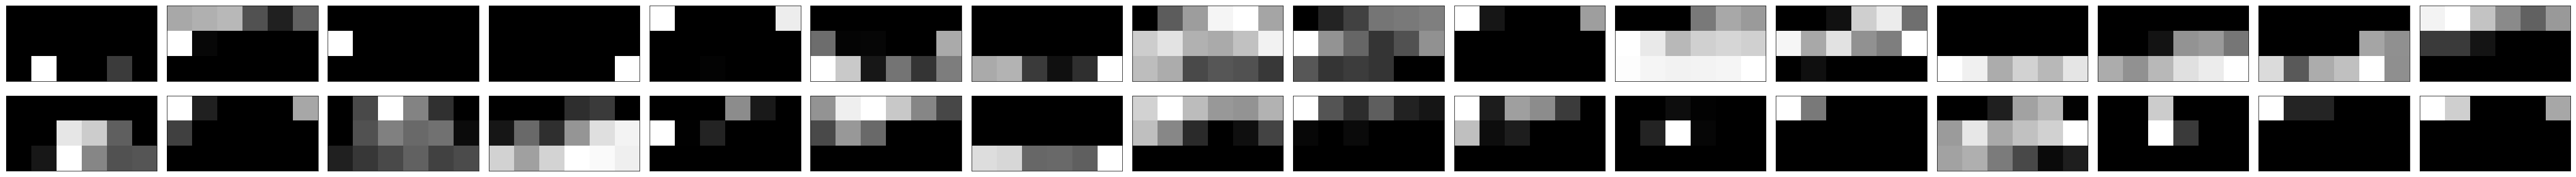

In [32]:
plot_layer(activations, image_number, 7, 16)